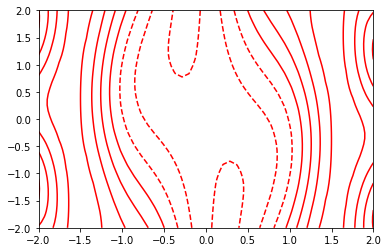

In [12]:
import numpy as np
from derivadas import Grad, Hess, cuadrados
import matplotlib.pyplot as plt

def obtener_derivadas(f, xk, gk='', Bk=''):
    if gk == '':
        gk = Grad(f, xk)
    if Bk == '':
        Bk = Hess(f, xk)
    return gk, Bk


def mk(f, xk, pk, gk='', Bk=''):
    gk, Bk = obtener_derivadas(f, xk, gk, Bk) 
    print(gk)
    print(Bk)
    return f(xk) + np.dot(gk, pk) + np.dot(np.dot(pk,Bk), pk)/2

## mk es ~ f(xk+pk)

def punto_cauchy(f, xk, deltak, gk='', Bk=''):  
    tauk = 1
    gk, Bk = obtener_derivadas(f, xk, gk, Bk) 
    cuadratica = np.dot(np.dot(gk,Bk), gk)
    if  cuadratica > 0:
        mintau = np.dot(gk,gk)**(3/2)/(deltak*cuadratica) 
        if mintau <1:
            tauk = mintau
    return -tauk * deltak * gk / (np.dot(gk,gk)**(1/2))


def f(x):
    return np.sin(x[0]) ** 10 + np.cos(10 + x[1] * x[0]) * np.cos(x[0])


x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 40)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])
plt.contour(X, Y, Z, colors='red');


In [13]:
print(punto_cauchy(cuadrados, [0,1,1,0], 100))

[[ 0.         -0.33326668 -0.33326668  0.        ]]


In [7]:
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 40)
X, Y = np.meshgrid(x, y)
Z = mk(f,[0,0],[X, Y])
plt.contour(X, Y, Z, colors='black')

[0. 0.]
[[0.83907152 0.54402116]
 [0.54402116 0.        ]]


ValueError: shapes (2,) and (2,40,50) not aligned: 2 (dim 0) != 40 (dim 1)